# <font color=red>CRUSTAL GEOFLUIDS - 3D Stress Projection on Fractures and Faults </font> 
  
## <font color=blue>Javier O. Guerrero </font>
### <font color=blue>JOG496 </font>
### <font color=orange> Spring 2021</font>

## Contents
1. <a href="#itemA"> Exercise 1</a>    
2. <a href="#itemB"> Exercise 2</a> 

In [11]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from IPython.display import display, HTML, Math, Latex
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

<a id='itemB'></a>
## <font color=green >Exercise 2 </font> 
The following figure and table summarize the geometry of faults at the High Island Block 24-L near the coast of the Gulf of Mexico and the Texas-Louisiana border.

![image here](./WP2_Exercise2.jpg)


1. <a href="#item5">Question 2.1</a> Calculate the stress tensor for each fault. The direction of $S_{hmin}$ is N-S.
2. <a href="#item6">Question 2.2 </a> Calculate the effective normal stress $\sigma_n$ and shear stress $\tau$ on each fault and plot the results together in a normalized 3D Mohr circle with x-axis ( $\sigma_n / \sigma_v$) and y-axis ( $\tau / \sigma_v$). Assume hydrostatic pore pressure d$P_p/$   d$z = 0.44$ psi/ft.
3. <a href="#item7">Question 2.3 </a> Are there any faults prone to reactivation (assume friction coefficient $\mu = 0.6$)? If yes, what faults are those?
4. <a href="#item8">Question 2.4 </a> Assuming that fluid injection would shift Mohr circles to lower $\sigma_n$ values without change of $\tau$ values (circle moves to the left without change of diameter - conservative assumption), what is the maximum allowable pressure increase without causing fault reactivation?
5. <a href="#item9">Question 2.5 </a> Plot the faults as straight lines in a 2D top view map and identify faults closer to reactivation. Suggestion: color segments according to the value of $\tau / \sigma_n$ where red is high likelihood for reactivation and blue is low likelihood for reactivation.

In [12]:
# Read data from CSV file
csv_path = 'WP2_Ex2_Summary_of_Faults_Simplified_to_Planar_Surfaces_Excel.csv'
df = pd.read_csv(csv_path)
df

,Fault ID,Segment Xorigin,Segment Yorigin,Segment Xend,Segment Yend,Average Depth,Dip,Pp,Sv,SH_max,Sh_min,Eend-Eorigin,Nend-Norigin,strike,dip_f
0,F1a,308,16772,3338,16106,7250,53SW,3190,7250,5727.5,5510,3030,-666,102.396596,53
1,F1b,3338,16106,8116,16556,7150,53S,3146,7150,5648.5,5434,4778,450,84.619659,53
2,F1c,8116,16556,12481,17589,7050,53SE,3102,7050,5569.5,5358,4365,1033,76.685609,53
3,F1d,12481,17589,17478,21367,7300,53SE,3212,7300,5767.0,5548,4997,3778,52.908764,53
4,F2,5535,14938,7824,16209,7500,52SE,3300,7500,5925.0,5700,2289,1271,60.958149,52
5,F3,15162,12008,17994,14322,7800,55SE,3432,7800,6162.0,5928,2832,2314,50.748072,55
6,F4a,713,13675,3623,14480,7400,56SE,3256,7400,5846.0,5624,2910,805,74.536837,56
7,F4b,3623,14480,6489,14394,7400,56S,3256,7400,5846.0,5624,2866,-86,91.718757,56
8,F4c,6489,14394,10095,12178,7500,56SW,3300,7500,5925.0,5700,3606,-2216,121.572028,56
9,F4d,10095,12178,14704,11738,7700,56S,3388,7700,6083.0,5852,4609,-440,95.453238,56


<a id='item5'></a>
### **Question 2.1:**  
Calculate the stress tensor for each fault. The direction of  𝑆ℎ𝑚𝑖𝑛  is N-S.

In [13]:
df['S1'] = df[['Sv', 'SH_max', 'Sh_min']].max(axis=1)
df['S3'] = df[['Sv', 'SH_max', 'Sh_min']].min(axis=1)
df['S2'] = df['Sv']+df['SH_max']+df['Sh_min']-df['S1']-df['S3']

df['Sn'] = 0
df['SigmaN'] = 0 
df['tau'] = 0
df['Ratio'] = 0

Pp = df['Pp']
S1 = df['S1']
S2 = df['S2']
S3 = df['S3']
dip = df['dip_f']
strike = df['strike']
Sn= df['Sn']
SigmaN = df['SigmaN']
tau = df['tau'] 
Ratio = df['Ratio']
alpha_deg = 0
beta_deg = 90
gamma_deg = 0
alpha = alpha_deg / 180 * np.pi
beta = beta_deg / 180 * np.pi
gamma = gamma_deg / 180 * np.pi
R_pg = np.array([[np.cos(alpha)*np.cos(beta), np.sin(alpha)*np.cos(beta), -np.sin(beta)],[np.cos(alpha)*np.sin(beta)*np.sin(gamma)-np.sin(alpha)*np.cos(gamma), np.sin(alpha)*np.sin(beta)*np.sin(gamma)+np.cos(alpha)*np.cos(gamma), np.cos(beta)*np.sin(gamma)],[np.cos(alpha)*np.sin(beta)*np.cos(gamma)+np.sin(alpha)*np.sin(gamma), np.sin(alpha)*np.sin(beta)*np.cos(gamma)-np.cos(alpha)*np.sin(gamma), np.cos(beta)*np.cos(gamma)]])
print('R_pg = ', R_pg)
print(' \n')

R_pgT = R_pg.transpose() # Transpose of the change of basis matrix
print('R_pgT = ', R_pgT)
print(' \n')

for i in range(S1.shape[0]):
    #print('index:', i)
    Sp = np.array([[S1[i], 0, 0],[0, S2[i], 0],[0, 0, S3[i]]])
    #print('Sp = ', Sp)
    #print(' \n')
    Sg = R_pgT.dot(Sp).dot(R_pg)
    #print('Sg = ', Sg)
    #print('------ \n')
    Nni = -np.sin(strike[i]/180*np.pi)*np.sin(dip[i]/180*np.pi)
    Nnj= np.cos(strike[i]/180*np.pi)*np.sin(dip[i]/180*np.pi)
    Nnk = -np.cos(dip[i]/180*np.pi)
    Nn = np.array([[Nni],[Nnj],[Nnk]])
    #print('Nn')
    #print(Nn)
    #print('-------')
    t = Sg.dot(Nn)
    #print('t')
    #print(t)
    #print('=====\n')
    Sn[i] = t[0,0]*Nni + t[1,0]*Nnj + t[2,0]*Nnk
    SigmaN[i] = Sn[i]- Pp[i]
    tau[i] = np.sqrt((np.linalg.norm(t))**2-(Sn[i])**2)
    #Ratio[i] = tau[i]/SigmaN[i]
df['Ratio'] =    df['tau'] / df['SigmaN']
df['SigmaN/SigmaV'] = df['SigmaN'] / (df['Sv']-df['Pp'])
df['tau/SigmaV'] = df['tau'] / (df['Sv']-df['Pp'])
df
    

R_pg =  [[ 6.123234e-17  0.000000e+00 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [ 1.000000e+00  0.000000e+00  6.123234e-17]]
 

R_pgT =  [[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]
 



,Fault ID,Segment Xorigin,Segment Yorigin,Segment Xend,Segment Yend,Average Depth,Dip,Pp,Sv,SH_max,...,dip_f,S1,S3,S2,Sn,SigmaN,tau,Ratio,SigmaN/SigmaV,tau/SigmaV
0,F1a,308,16772,3338,16106,7250,53SW,3190,7250,5727.5,...,53,7250.0,5510.0,5727.5,6146,2956,836,0.282815,0.728079,0.205911
1,F1b,3338,16106,8116,16556,7150,53S,3146,7150,5648.5,...,53,7150.0,5434.0,5648.5,6056,2910,829,0.284880,0.726773,0.207043
2,F1c,8116,16556,12481,17589,7050,53SE,3102,7050,5569.5,...,53,7050.0,5358.0,5569.5,5977,2875,815,0.283478,0.728217,0.206434
3,F1d,12481,17589,17478,21367,7300,53SE,3212,7300,5767.0,...,53,7300.0,5548.0,5767.0,6233,3021,810,0.268123,0.738992,0.198141
4,F2,5535,14938,7824,16209,7500,52SE,3300,7500,5925.0,...,52,7500.0,5700.0,5925.0,6415,3115,852,0.273515,0.741667,0.202857
5,F3,15162,12008,17994,14322,7800,55SE,3432,7800,6162.0,...,55,7800.0,5928.0,6162.0,6606,3174,846,0.266541,0.726648,0.193681
6,F4a,713,13675,3623,14480,7400,56SE,3256,7400,5846.0,...,56,7400.0,5624.0,5846.0,6190,2934,818,0.278800,0.708012,0.197394
7,F4b,3623,14480,6489,14394,7400,56S,3256,7400,5846.0,...,56,7400.0,5624.0,5846.0,6179,2923,826,0.282586,0.705357,0.199324
8,F4c,6489,14394,10095,12178,7500,56SW,3300,7500,5925.0,...,56,7500.0,5700.0,5925.0,6305,3005,812,0.270216,0.715476,0.193333
9,F4d,10095,12178,14704,11738,7700,56S,3388,7700,6083.0,...,56,7700.0,5852.0,6083.0,6431,3043,858,0.281959,0.705705,0.198980


In [23]:
df.to_csv('Table3.csv', index = False)

<a id='item6'></a>
### **Question 2.2:**  
Calculate the effective normal stress  **𝜎_𝑛**  and shear stress **𝜏**  on each fault and plot the results together in a normalized 3D Mohr circle with x-axis (  𝜎𝑛/𝜎𝑣 ) and y-axis (  𝜏/𝜎𝑣 ). Assume hydrostatic pore pressure d 𝑃𝑝/  d 𝑧=0.44  psi/ft.


In [14]:
# DEFINE FUNCTION TO PLOT MOHR'S CIRCLE
def plotMohr3D(sig3,sig2,sig1):
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    ax.plot(circle1X,circle1Y,'r')
    ax.plot(circle2X,circle2Y,'g')
    ax.plot(circle3X,circle3Y,'b')
    # Plot labels
    plt.xlabel(r'$\sigma \; [psi]$', fontsize=10)
    plt.ylabel(r'$\tau \; [psi]$')
    # Plot layout
    plt.axis('square')
    plt.tight_layout()
    ax.grid()
    # Axis range
    #plt.xlim([1000, 2500])
    #plt.ylim([0, 800])

<IPython.core.display.Javascript object>


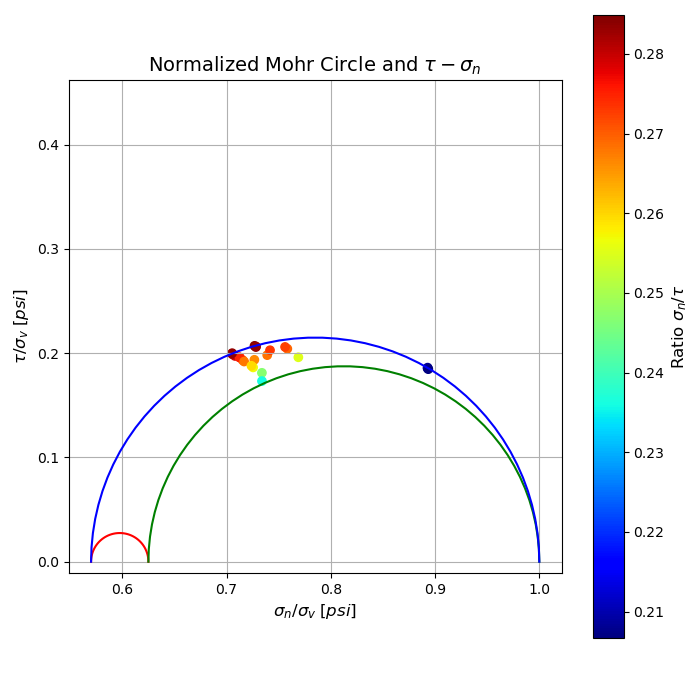

Text(51.847222222222214, 0.5, '$\\tau / \\sigma_v \\; [psi]$')

In [28]:
plotMohr3D(0.57,0.625,1)
c1 = df['tau/SigmaV'] / df['SigmaN/SigmaV']
plt.scatter(df['SigmaN/SigmaV'], df['tau/SigmaV'], c=c1, marker='o', cmap=cm.jet)
cbar = plt.colorbar()
cbar.set_label('Ratio ' r'$\sigma_n / \tau$', fontsize=12)
plt.title('Normalized Mohr Circle and ' r'$\tau  - \sigma_n $', fontsize=14)
plt.xlabel(r'$\sigma_n / \sigma_v \; [psi]$', fontsize=12)
plt.ylabel(r'$\tau / \sigma_v \; [psi]$', fontsize=12)
# plt.grid(b=True, which='major', color='#300000', linestyle='-')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='#900000', linestyle=':')


<a id='item7'></a>
### **Question 2.3:**  
Are there any faults prone to reactivation (assume friction coefficient  𝜇=0.6 )? If yes, what faults are those?

<IPython.core.display.Javascript object>


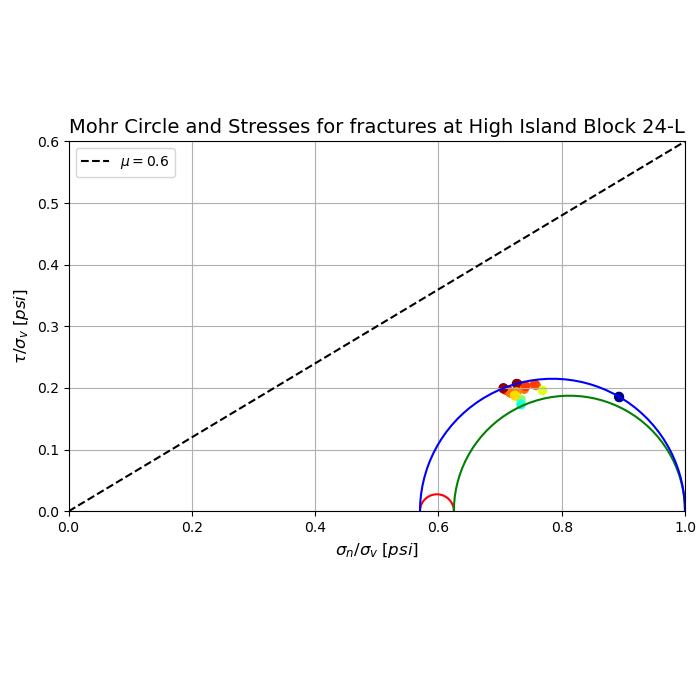

Text(51.847222222222214, 0.5, '$\\tau / \\sigma_v \\; [psi]$')

In [30]:
# Plot mohr Circled
plotMohr3D(0.57,0.625,1)
c1 = df['tau/SigmaV'] / df['SigmaN/SigmaV']

# Plot Normalized normal and shear stresses for each fault 
plt.scatter(df['SigmaN/SigmaV'], df['tau/SigmaV'], c=c1, marker='o', cmap=cm.jet)
plt.title('Mohr Circle and Stresses for fractures at High Island Block 24-L', fontsize=14)

# Plot Shear - Failure line
sig_range = np.arange(0, 10)
mu0_6 = sig_range * 0.6
L4 = plt.plot(sig_range, mu0_6, 'k--', label=r'$\mu=0.6$')

# Axis range
plt.grid(b=True, which='major', linestyle='-')
plt.xlim([0, 1])
plt.ylim([0, 0.6])
plt.legend()
plt.xlabel(r'$\sigma_n / \sigma_v \; [psi]$', fontsize=12)
plt.ylabel(r'$\tau / \sigma_v \; [psi]$', fontsize=12)
# plt.grid(b=True, which='major', color='#300000', linestyle='-')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='#900000', linestyle=':')
# Change plot size
#fig.set_size_inches(7, 10)

<font color=blue> $\mu = 0.6$  $\Rightarrow$ None of the Faults are prone to reactivation </font> 

<a id='item8'></a>
### **Question 2.4:**  
Assuming that fluid injection would shift Mohr circles to lower  𝜎𝑛  values without change of  𝜏  values (circle moves to the left without change of diameter - conservative assumption), what is the maximum allowable pressure increase without causing fault reactivation?

In [19]:
# DEFINE FUNCTION TO PLOT MULTIPLE MOHR'S CIRCLES IN SAME FIGURE
def JGplotMohr3D(sig3,sig2,sig1):
    #fig = plt.figure(figsize=(7,7))
    #ax = fig.add_subplot(111)
    circle1X=[]
    circle1Y=[]
    circle2X=[]
    circle2Y=[]
    circle3X=[]
    circle3Y=[]
    for i in np.linspace(0,np.pi):
        circle1X.append((sig2-sig3)/2*np.cos(i) + (sig3+(sig2-sig3)/2))
        circle2X.append((sig1-sig2)/2*np.cos(i) + (sig2+(sig1-sig2)/2))
        circle3X.append((sig1-sig3)/2*np.cos(i) + (sig3+(sig1-sig3)/2))
        circle1Y.append((sig2-sig3)/2*np.sin(i) )
        circle2Y.append((sig1-sig2)/2*np.sin(i) )
        circle3Y.append((sig1-sig3)/2*np.sin(i) )
    plt.plot(circle1X,circle1Y,'r')
    plt.plot(circle2X,circle2Y,'g')
    plt.plot(circle3X,circle3Y,'b')
    # Plot labels
    plt.xlabel(r'$\sigma \; [psi]$', fontsize=10)
    plt.ylabel(r'$\tau \; [psi]$')
    # Plot layout
    plt.axis('square')
    plt.tight_layout()
    # Axis range
    #plt.xlim([1000, 2500])
    #plt.ylim([0, 800])

<IPython.core.display.Javascript object>


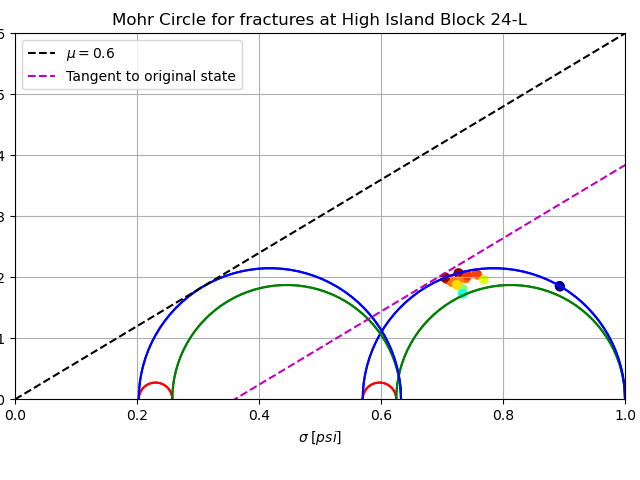

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [33]:
%matplotlib notebook
d = 0.36715
df2 = pd.DataFrame(np.array([[0.57, 0.625, 1], [0.57-d, 0.625-d, 1-d]]),
                   columns=['sig3', 'sig2', 'sig1'])
df2
sigma1 = df2['sig1']
sigma2 = df2['sig2']
sigma3 = df2['sig3']

# Plot Mohr Circles
for i in range(0, len(sigma1)):
    JGplotMohr3D(sigma3[i], sigma2[i], sigma1[i])
    JGplotMohr3D(sigma3[i], sigma2[i], sigma1[i])


c1 = df['tau/SigmaV'] / df['SigmaN/SigmaV']
plt.scatter(df['SigmaN/SigmaV'], df['tau/SigmaV'], c=c1, marker='o', cmap=cm.jet)
#cbar = plt.colorbar()
plt.title('Mohr Circle for fractures at High Island Block 24-L', fontsize=12)
sig_range = np.arange(0, 10)

mu0_6 = sig_range * 0.6
#mu0_8 = (sig_range * 0.6) - 0.22
mu0_9 = (sig_range -0.36) * 0.6
L4 = plt.plot(sig_range, mu0_6, 'k--', label=r'$\mu=0.6$')
#L5 = plt.plot(sig_range, mu0_8, 'c--', label=r'$\mu=0.8$')
L5 = plt.plot(sig_range, mu0_9, 'm--', label='Tangent to original state')

# Axis range
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='-', color='b')
plt.xlim([0, 1])
plt.ylim([0, 0.6])
plt.legend()
plt.tight_layout
# Change plot size
#fig.set_size_inches(7, 10)

<font color=blue> $\Rightarrow$ The maximum allowable pressure increase without causing fault reactivation occurs when Pore pressure increases in an amount equal to the 36% of the Original Effective Vertical stress at each fault location </font> 

<a id='item9'></a>
### **Question 2.5:**  
Plot the faults as straight lines in a 2D top view map and identify faults closer to reactivation. Suggestion: color segments according to the value of  𝜏/𝜎𝑛  where red is high likelihood for reactivation and blue is low likelihood for reactivation.

In [21]:
csv_path2 = 'WP2_Ex2_Summary_of_Faults_Simplified_to_Planar_Surfaces_2dplot.csv'
df4 = pd.read_csv(csv_path2)
df3 = df4  

<IPython.core.display.Javascript object>


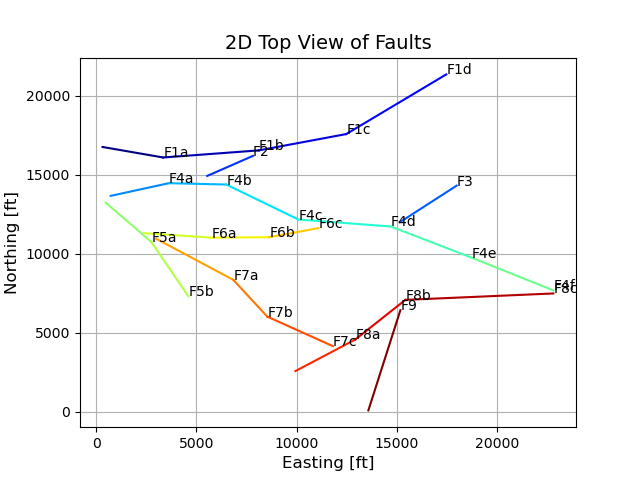

In [22]:
%matplotlib notebook
uniq = np.unique(df['Fault ID'].values)
cmap = cm.jet
c2 = np.linspace(0.0, 1.0, 24)
for i, j in zip(uniq,range(24)):
    df4 = df3[df3['Fault']==i]
    x = df4['Easting'].values
    y = df4['Northing'].values
    z = df4['Ratio']
    plt.plot(x,y, color=cmap(c2[j]), label=df4['Fault'].values[0])
    plt.annotate(str(df4['Fault'].values[0]), (x[1], y[1]), size=10)


plt.title('2D Top View of Faults', fontsize=14)
plt.xlabel('Easting [ft]', fontsize=12)
plt.ylabel('Northing [ft]', fontsize=12)
plt.grid()
plt.tight_layout
plt.show()